In [1]:
from src.model import PyTradeShifts
from src.postprocessing import Postprocessing
import pandas as pd
import os
os.chdir('../')

In [2]:
print(os.getcwd())

/home/florian/Documents/GitHub/pytradeshifts


In [3]:
NW_data = pd.read_csv("data/scenario_files/losing_industry/Wheat2mean_values.csv", header=None)
NW_data.head()

,0,1
0,Morocco,-0.233709
1,Paraguay,-0.171959
2,Czech Republic,-0.552913
3,Egypt,-0.673669
4,Iran,-0.211295


Loaded data for Wheat in Y2021.
Removed 1 countries with no trade or production.
Prebalanced trade matrix.
Determinant=0 encountered in PyTradeShifts.correct_reexports().
Re-applying PyTradeShifts.remove_net_zero_countries().
Removed 1 countries with no trade or production.
Attempting to invert the matrix again.
Corrected re-exports.


Retained 94 countries from the trade matrix
Removed countries with trade below the 75th percentile.
Built trade graph.
Found 7 trade communities.


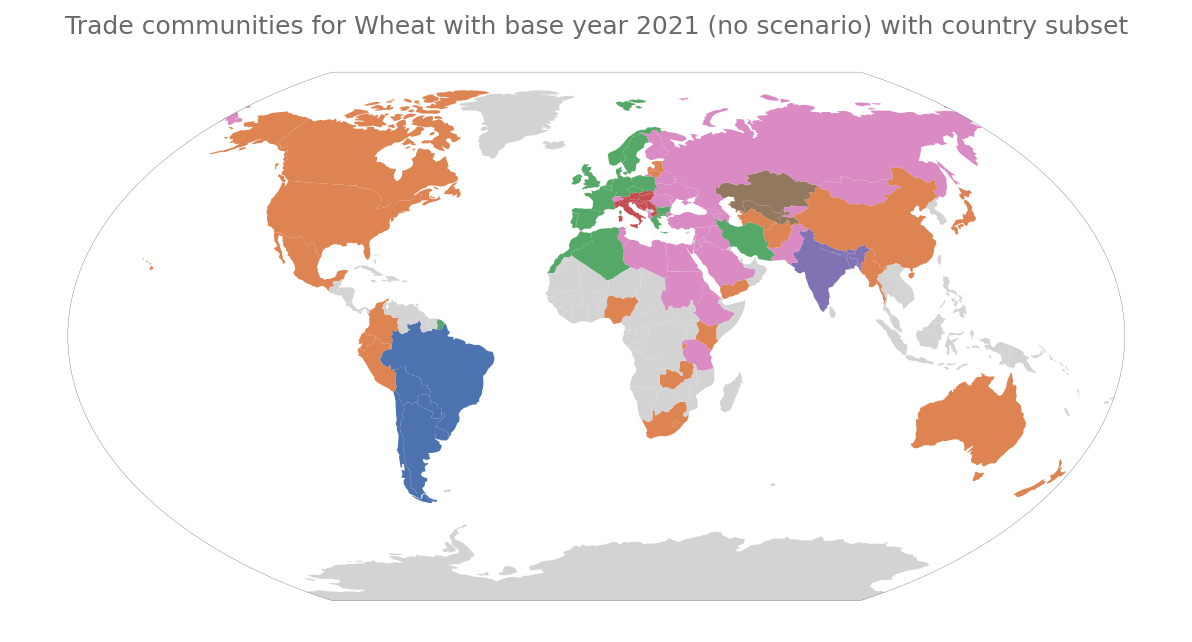

In [4]:
base_wheat = PyTradeShifts(
    "Wheat",
    2021,
    region="Global",
    cd_kwargs={"seed": 2},
    countries_to_keep=list(NW_data[0].values),
    make_plot=True,
)

Loaded data for Wheat in Y2021.
Removed 1 countries with no trade or production.
Prebalanced trade matrix.
Determinant=0 encountered in PyTradeShifts.correct_reexports().
Re-applying PyTradeShifts.remove_net_zero_countries().
Removed 1 countries with no trade or production.
Attempting to invert the matrix again.
Corrected re-exports.
Removed countries with trade below the 75th percentile.
Applied scenario NW Wheat.
Built trade graph.
Found 18 trade communities.
Keeping communities with only one country.


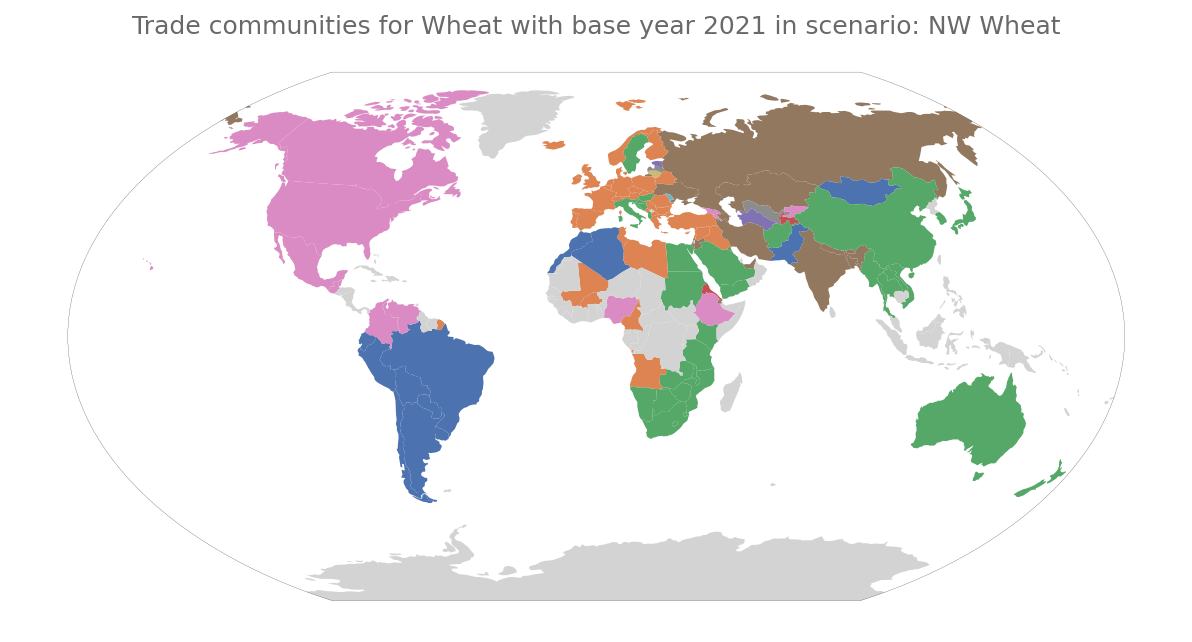

In [12]:
NW_Wheat = PyTradeShifts(
    crop="Wheat",
    region="Global",
    #with_preprocessing=True,
    base_year=2021,
    scenario_file_name="nuclear_winter/xia_150tg_y3_swheat.csv",
    scenario_name="NW Wheat",
    cd_kwargs={"seed": 2},
    keep_singletons=True,
    make_plot=True,
)

In [6]:
comparison = Postprocessing([base_wheat, NW_Wheat], anchor_countries=["China", "Russia", "Germany"])

Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.
Skipping community similarity index computation for this country.


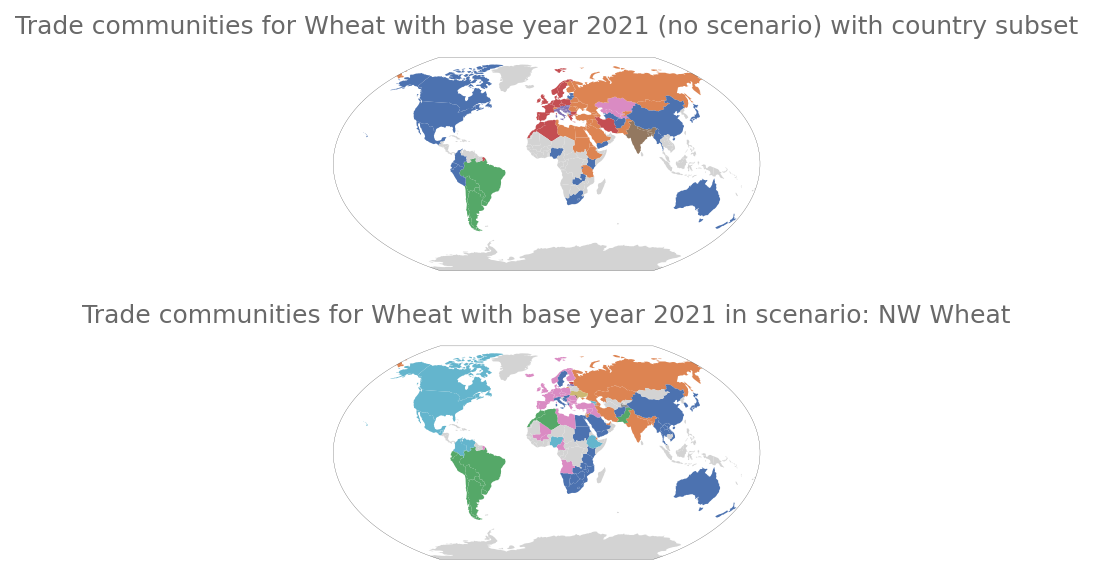

In [7]:
comparison.plot_all_trade_communities()

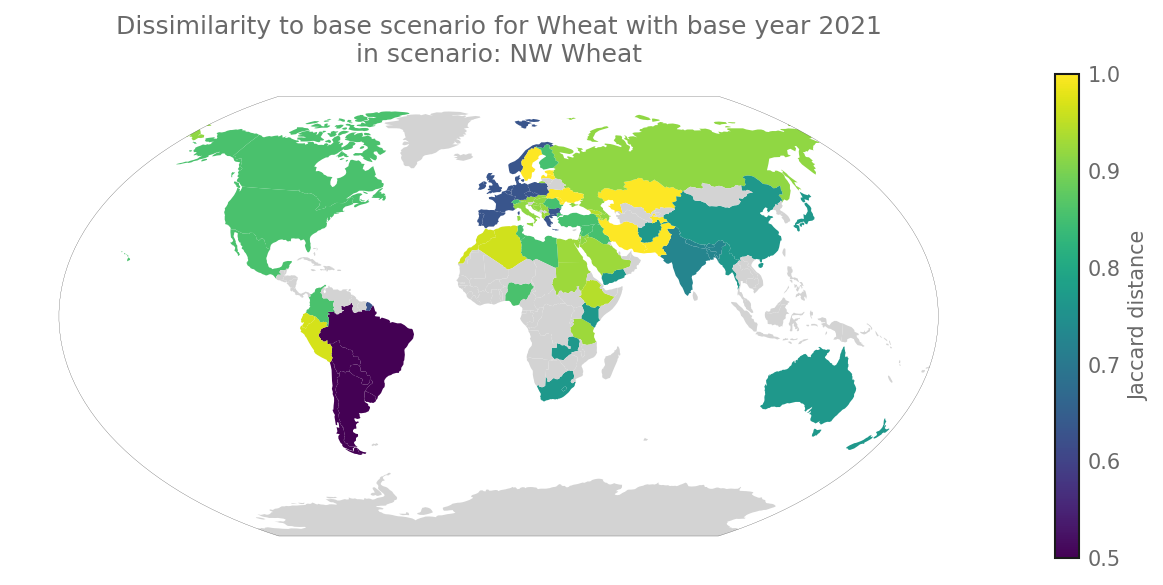

In [8]:
comparison.plot_community_difference()

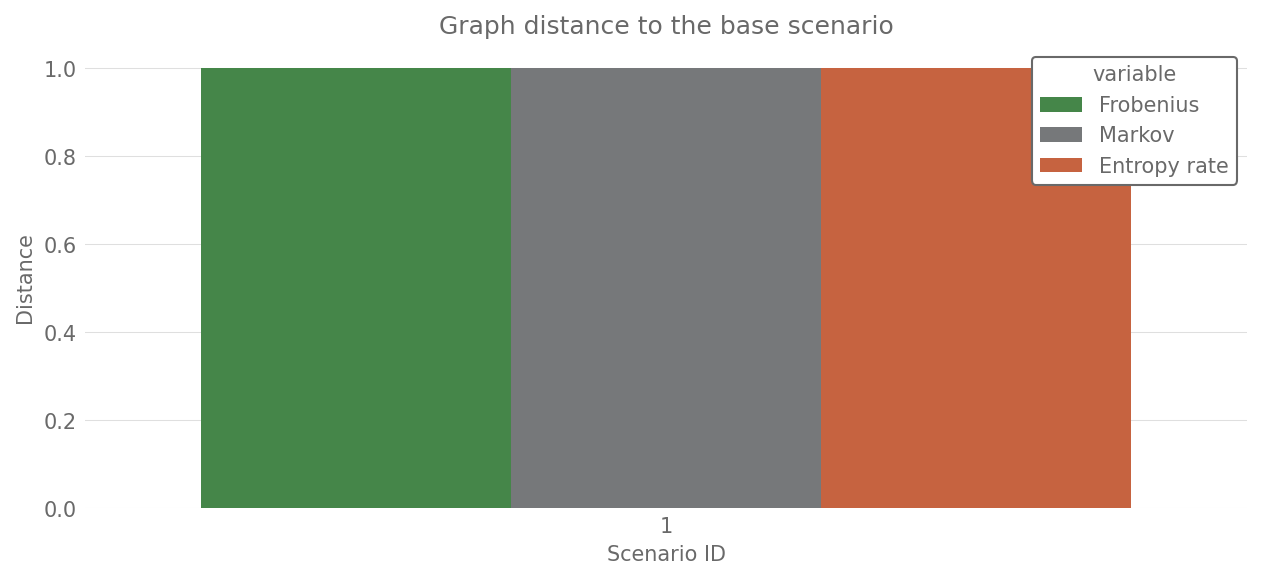

In [9]:
comparison.plot_distance_metrics(frobenius="relative")

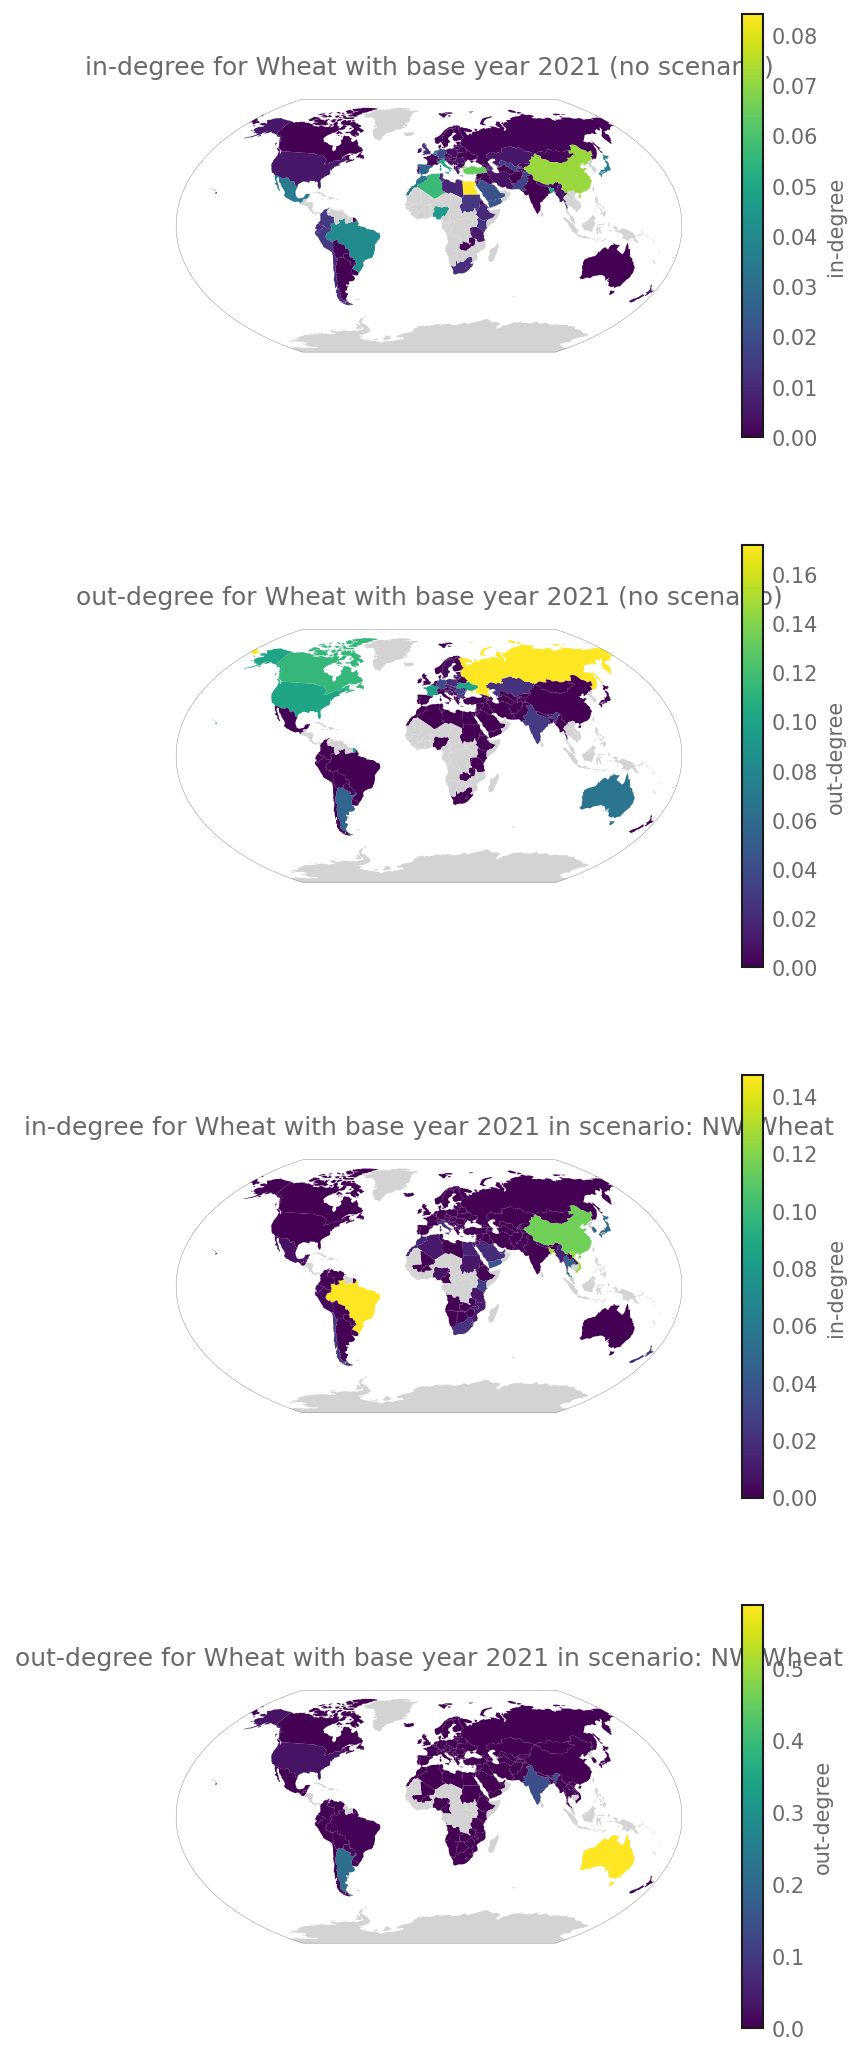

In [10]:
comparison.plot_centrality_maps(figsize=(5, 25), shrink=0.2)

In [11]:
comparison.print_per_community_centrality_metrics(index=False)

***| Degree centrality metrics for the scenario with ID: 0 |***
╒═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════════╤══════════════╤══════════════╤══════════════╕
│   Community │ Smallest    │    Smallest │ Largest     │     Largest │ Smallest        │     Smallest │ Largest      │      Largest │
│          ID │ in-degree   │   in-degree │ in-degree   │   in-degree │ out-degree      │   out-degree │ out-degree   │   out-degree │
│             │ country     │       value │ country     │       value │ country         │        value │ country      │        value │
╞═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════════╪══════════════╪══════════════╪══════════════╡
│           0 │ Australia   │ 0           │ China       │   0.071251  │ Afghanistan     │  0           │ Canada       │    0.114551  │
├─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────────┼──────────────┼──────────────┼───────